In [1]:
!python libraries.py

2024-08-24 17:29:54,874 - INFO - Installation of all libraries completed!


In [2]:
import pickle

In [3]:
import os
from config import Config

config = Config(
    data_dir='./data',
    train_data_subdir='train/',
    val_data_subdir='test/',
    test_data_subdir='test/'
)

data_dir = ['test', 'train', 'val']
train_data_dir = ['TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.csv']
val_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
test_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']


In [4]:
import pandas as pd
import numpy as np

## Testing Data

In [5]:
test_data_filename = os.listdir(config.get_test_data_dir())[2]
test_data_path = os.path.join(config.get_test_data_dir(), test_data_filename)
test_data = pd.read_csv(test_data_path)
test_data.columns

Index(['V', 'I', 'Temp', 'V_avg', 'I_avg', 'SOC'], dtype='object')

### Extracting Features for Testing
In this cell, we extract specific features from the testing data for use in model testing

In [6]:
X_test = test_data[['V', 'I', 'Temp', 'V_avg', 'I_avg']].values
X_test.shape

(44284, 5)

In [7]:
X_test

array([[0.96801895, 0.74911237, 0.52123591, 0.96801895, 0.74911237],
       [0.96531628, 0.7470984 , 0.52123591, 0.96666762, 0.74810539],
       [0.96519787, 0.74699221, 0.52123591, 0.9661777 , 0.74773433],
       ...,
       [0.33512765, 0.75102009, 0.53256776, 0.32981484, 0.75102009],
       [0.33512765, 0.75102009, 0.53256776, 0.32985141, 0.75102009],
       [0.33512765, 0.75102009, 0.53256776, 0.3298875 , 0.75102009]])

### Extracting Target Variable for Testing

In this cell, we extract the target variable from the testing data

In [8]:
y_test = test_data['SOC'].values
y_test.shape

(44284,)

In [9]:
y_test

array([1.        , 0.99999   , 0.99998333, ..., 0.19499   , 0.19499   ,
       0.19499   ])

In [10]:
soc_observed = y_test

## Data Normalization

In [11]:
import utils

### Normalizing Feature Data

In this cell, we normalize the feature data for training and validation:
- `normalized_X_train = utils.normalize(X_train)` and `normalized_X_val = utils.normalize(X_val)`
    - Applies normalization to the feature set `X_train` and `X_val` using the `normalize` function from the `utils` module.
    - Normalization typically scales the features to a standard range, improving the performance and convergence of learning algorithms.

This step ensures that the feature data is on a comparable scale, which can be crucial for many learning models.

In [12]:
normalized_X_test = utils.normalize(X_test)
normalized_X_test

array([[ 1.        ,  0.02007657, -1.        ,  1.        ,  0.02007657],
       [ 0.99393247,  0.01412849, -1.        ,  1.        ,  0.01864986],
       [ 0.99559568,  0.01476778, -1.        ,  1.        ,  0.01810358],
       ...,
       [-0.97477332,  1.        , -0.0372726 , -1.        ,  1.        ],
       [-0.97494477,  1.        , -0.03736266, -1.        ,  1.        ],
       [-0.97511403,  1.        , -0.03745156, -1.        ,  1.        ]])

# Linear Regression Testing

In this cell, we load a previously saved linear regression model from a file:

- **Model File Path**:
  - `lregression_model_path = './models/ml/soc_estimation_ml_lregression.sav'`
    - Specifies the file path where the model is saved.

- **Load the Model**:
  - `lregression_model = pickle.load(open(lregression_model_path, 'rb'))`
    - Uses the `pickle` module to deserialize and load the `lregression_model` from the specified file path.
    - `open(lregression_model_path, 'rb')` opens the file in read-binary mode.
    - `pickle.load` reads the model from the file, restoring it to be used for making predictions or further analysis.

This step allows you to reload the trained linear regression model and use it without needing to retrain.

In [13]:
lregression_model_path = './models/ml/soc_estimation_ml_lregression.sav'
lregression_model = pickle.load(open(lregression_model_path, 'rb'))

### Making Predictions with the Linear Regression Model

In this cell, we use the loaded linear regression model to make predictions:

- **Predict Target Values**:
  - `soc_predicted = lregression_model.predict(normalized_X_test)`
    - Uses the `predict` method of the `lregression_model` to generate predictions.
    - `normalized_X_test` contains the normalized feature data for which predictions are to be made.
    - The model predicts the target variable, which is stored in `soc_predicted`.

This step allows you to obtain predicted values for the target variable (`SOC`) based on the test data using the trained linear regression model.

In [14]:
soc_predicted = lregression_model.predict(normalized_X_test)
soc_predicted

array([0.96096553, 0.96030846, 0.96064429, ..., 0.20757221, 0.20754155,
       0.20751128])

### Evaluating Linear Regressor Performance

In this cell, we evaluate the performance of the linear regression model on the test data:

- **Calculate Model Score**:
  - `result = lregression_model.score(normalized_X_test, y_test)`
    - Uses the `score` method of the `lregression_model` to calculate the coefficient of determination \( R^2 \) for the test data.
    - `normalized_X_test` contains the normalized feature data used for prediction.
    - `y_test` contains the true target values for comparison.

- **Print Accuracy**:
  - `print("Accuracy: %.2f%%" % (result*100.0))`
    - Formats and prints the \( R^2 \) score as a percentage to indicate the model's accuracy.
    - The \( R^2 \) score measures how well the model's predictions match the true values, with higher values indicating better performance.

This step provides an assessment of how well the linear regression model performs on unseen test data.

In [15]:
result = lregression_model.score(normalized_X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 92.36%


In [18]:
lregression_metrics = utils.get_metrics(soc_observed, soc_predicted)
lregression_metrics

,Metric,Value
0,max_error,0.271403
1,mean_absolute_error,0.061482
2,mean_absolute_percentage_error,0.114238
3,mean_squared_error,0.005756
4,root_mean_squared_error,0.075870
5,root_mean_squared_log_error,0.048605


### Plotting Observed vs. Predicted Values for Linear Regressor

In this cell, we visualize the comparison between observed and predicted values:

- **Plot Observed vs. Predicted**:
  - `utils.plot_obs_pred(...)`
    - Uses the `plot_obs_pred` function from the `utils` module to create a plot comparing observed and predicted values.
    - **Parameters**:
      - `y_test=soc_observed`: The actual target values from the test data.
      - `y_predicted=soc_predicted`: The predicted values generated by the model.
      - `ylabel='SOC'`: Label for the y-axis, representing the state of charge (SOC).
      - `xlabel='Time (s)'`: Label for the x-axis, representing time in seconds.

This visualization helps in assessing the accuracy of the model's predictions by comparing them to the actual values over time.

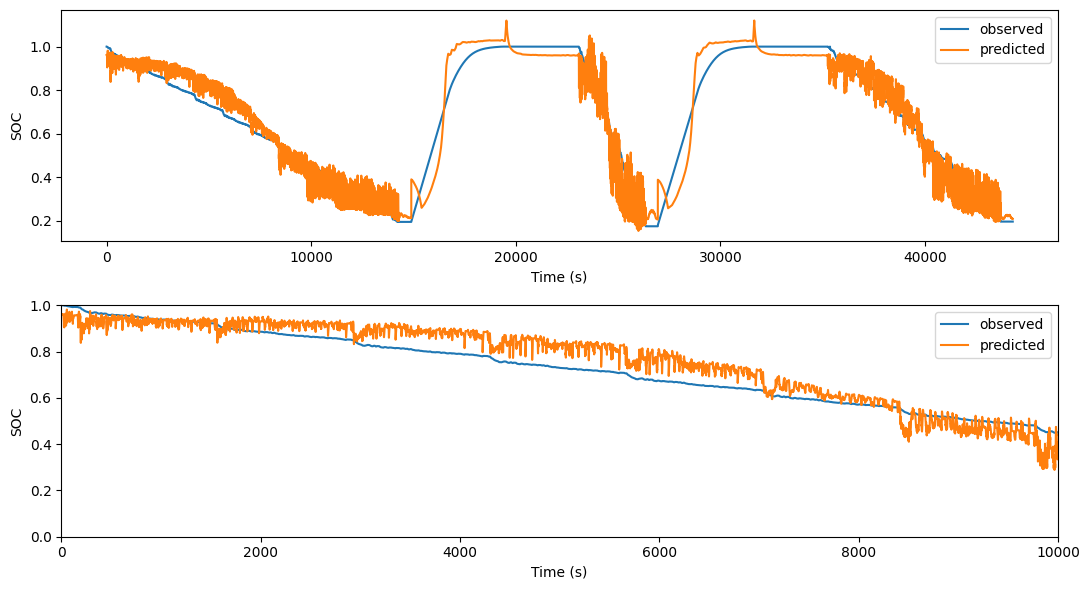

In [19]:
utils.plot_obs_pred(
    y_test=soc_observed, 
    y_predicted=soc_predicted, 
    ylabel='SOC', 
    xlabel='Time (s)'
)

# Decision Tree Testing

In this cell, we load a previously saved decision tree regressor model from a file:

- **Model File Path**:
  - `decisiontree_model_path = './models/ml/soc_estimation_ml_decisiontree.sav'`
    - Specifies the file path where the model is saved.

- **Load the Model**:
  - `decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))`
    - Uses the `pickle` module to deserialize and load the `decisiontree_model` from the specified file path.
    - `open(decisiontree_model_path, 'rb')` opens the file in read-binary mode.
    - `pickle.load` reads the model from the file, restoring it to be used for making predictions or further analysis.

This step allows you to reload the trained decision tree regressor model for future use without needing to retrain it.


In [20]:
decisiontree_model_path = './models/ml/soc_estimation_ml_decisiontree.sav'
decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))

### Making Predictions with the Decision Tree Regressor

In this cell, we use the loaded decision tree regressor model to make predictions:

- **Predict Target Values**:
  - `soc_predicted = decisiontree_model.predict(normalized_X_test)`
    - Uses the `predict` method of the `decisiontree_model` to generate predictions.
    - `normalized_X_test` contains the normalized feature data for which predictions are to be made.
    - The model predicts the target variable (`SOC`), which is stored in `soc_predicted`.

This step allows you to obtain predicted values for the target variable based on the test data using the trained decision tree regressor model.


In [21]:
soc_predicted = decisiontree_model.predict(normalized_X_test)
soc_predicted

array([1.        , 0.99999   , 0.99998333, ..., 0.21303333, 0.29203333,
       0.29203333])

### Evaluating Decision Tree Regressor Performance

In this cell, we evaluate the performance of the decision tree regressor model on the test data:

- **Calculate Model Score**:
  - `result = decisiontree_model.score(normalized_X_test, y_test)`
    - Uses the `score` method of the `decisiontree_model` to calculate the coefficient of determination \( R^2 \) for the test data.
    - `normalized_X_test` contains the normalized feature data used for prediction.
    - `y_test` contains the true target values for comparison.

- **Print Accuracy**:
  - `print("Accuracy: %.2f%%" % (result*100.0))`
    - Formats and prints the \( R^2 \) score as a percentage to indicate the model's accuracy.
    - The \( R^2 \) score measures how well the model's predictions match the true values, with higher values indicating better performance.

This step provides an assessment of how well the decision tree regressor model performs on unseen test data.


In [22]:
result = decisiontree_model.score(normalized_X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 94.08%


In [23]:
gpr_metrics = utils.get_metrics(soc_observed, soc_predicted)
gpr_metrics

,Metric,Value
0,max_error,0.414205
1,mean_absolute_error,0.039488
2,mean_absolute_percentage_error,0.086116
3,mean_squared_error,0.004458
4,root_mean_squared_error,0.066767
5,root_mean_squared_log_error,0.044145


### Plotting Observed vs. Predicted Values for Decision Tree Regressor

In this cell, we visualize the comparison between observed and predicted values using the decision tree regressor model:

- **Plot Observed vs. Predicted**:
  - `utils.plot_obs_pred(...)`
    - Uses the `plot_obs_pred` function from the `utils` module to create a plot comparing observed and predicted values.
    - **Parameters**:
      - `y_test=soc_observed`: The actual target values from the test data.
      - `y_predicted=soc_predicted`: The predicted values generated by the decision tree regressor model.
      - `ylabel='SOC'`: Label for the y-axis, representing the state of charge (SOC).
      - `xlabel='Time (s)'`: Label for the x-axis, representing time in seconds.

This visualization helps in assessing the accuracy of the decision tree regressor's predictions by comparing them to the actual values over time.


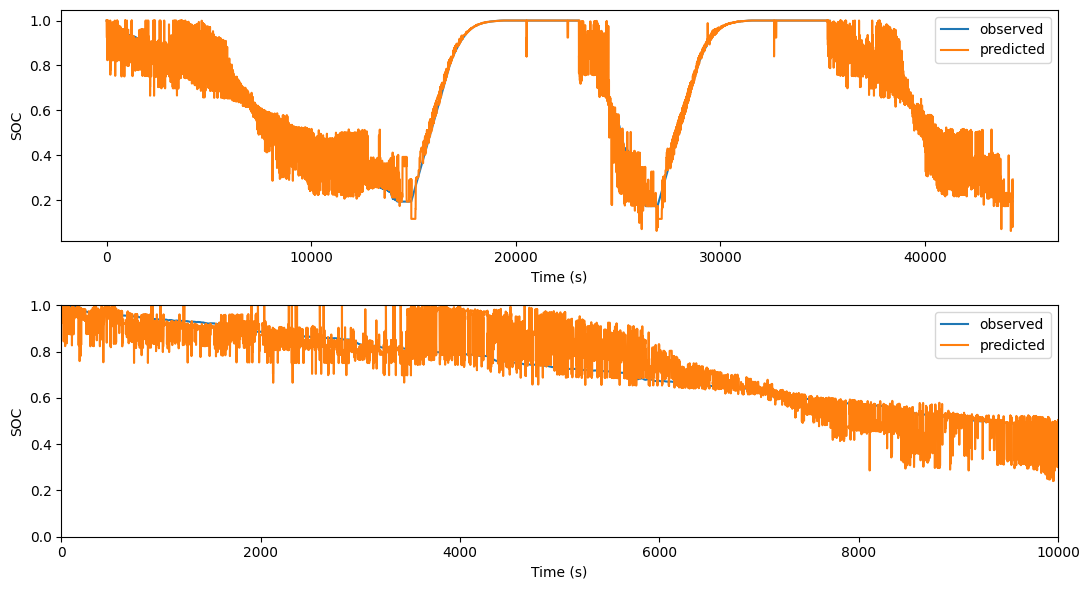

In [24]:
utils.plot_obs_pred(
    y_test=soc_observed, 
    y_predicted=soc_predicted, 
    ylabel='SOC', 
    xlabel='Time (s)'
)

# Nearest Neighbors Regression

In this cell, we load a previously saved K-Nearest Neighbors (KNN) regressor model from a file:

- **Model File Path**:
  - `decisiontree_model_path = './models/ml/soc_estimation_ml_nnregression.sav'`
    - Specifies the file path where the model is saved. Note: The variable name `decisiontree_model` suggests this is for a KNN model based on the file name.

- **Load the Model**:
  - `decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))`
    - Uses the `pickle` module to deserialize and load the model from the specified file path.
    - `open(decisiontree_model_path, 'rb')` opens the file in read-binary mode.
    - `pickle.load` reads the model from the file, restoring it to be used for making predictions or further analysis.

This step allows you to reload the trained KNN regressor model for future use without needing to retrain it.


In [25]:
decisiontree_model_path = './models/ml/soc_estimation_ml_nnregression.sav'
decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))

### Making Predictions with the K-Nearest Neighbors Regressor

In this cell, we use the loaded K-Nearest Neighbors (KNN) regressor model to make predictions:

- **Predict Target Values**:
  - `soc_predicted = decisiontree_model.predict(normalized_X_test)`
    - Uses the `predict` method of the `decisiontree_model` (assumed to be a KNN model) to generate predictions.
    - `normalized_X_test` contains the normalized feature data for which predictions are to be made.
    - The predicted values are stored in `soc_predicted`.

This step allows you to obtain predicted values for the target variable based on the test data using the trained KNN regressor model.


In [26]:
soc_predicted = decisiontree_model.predict(normalized_X_test)
soc_predicted

array([1.        , 0.99998933, 0.99997333, ..., 0.24665643, 0.24665643,
       0.24665643])

### Evaluating K-Nearest Neighbors Regressor Performance

In this cell, we evaluate the performance of the K-Nearest Neighbors (KNN) regressor model on the test data:

- **Calculate Model Score**:
  - `result = decisiontree_model.score(normalized_X_test, y_test)`
    - Uses the `score` method of the `decisiontree_model` (assumed to be a KNN model) to calculate the coefficient of determination \( R^2 \) for the test data.
    - `normalized_X_test` contains the normalized feature data used for prediction.
    - `y_test` contains the true target values for comparison.

- **Print Accuracy**:
  - `print("Accuracy: %.2f%%" % (result*100.0))`
    - Formats and prints the \( R^2 \) score as a percentage to indicate the model's accuracy.
    - The \( R^2 \) score measures how well the model's predictions match the true values, with higher values indicating better performance.

This step provides an assessment of how well the KNN regressor model performs on unseen test data.


In [27]:
result = decisiontree_model.score(normalized_X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 95.42%


In [28]:
gpr_metrics = utils.get_metrics(soc_observed, soc_predicted)
gpr_metrics

,Metric,Value
0,max_error,0.414205
1,mean_absolute_error,0.035620
2,mean_absolute_percentage_error,0.078228
3,mean_squared_error,0.003448
4,root_mean_squared_error,0.058721
5,root_mean_squared_log_error,0.039209


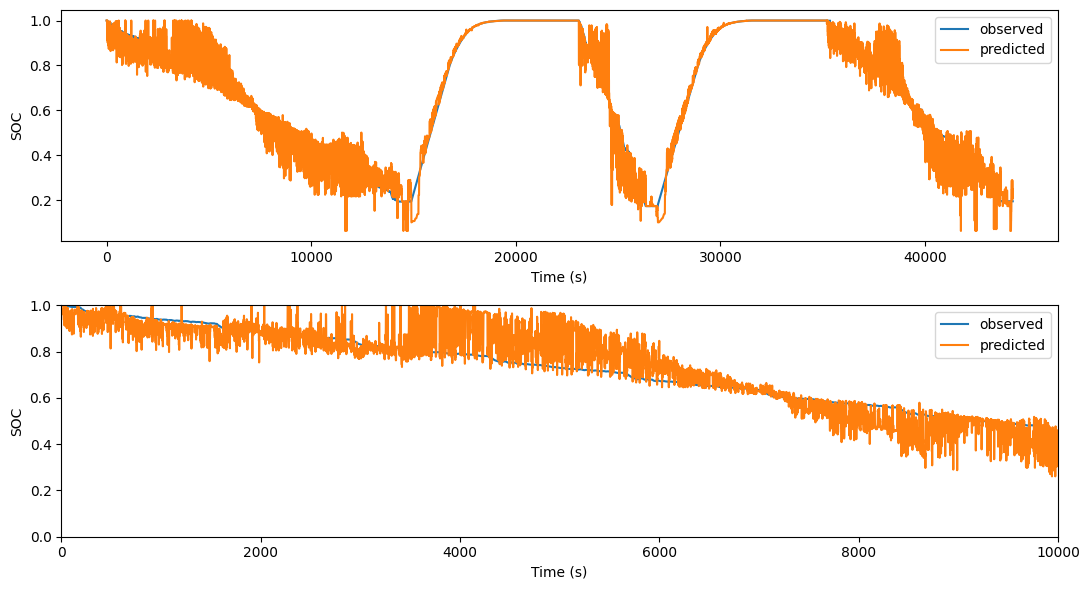

In [29]:
utils.plot_obs_pred(
    y_test=soc_observed, 
    y_predicted=soc_predicted, 
    ylabel='SOC', 
    xlabel='Time (s)'
)